<a href="https://colab.research.google.com/github/Dancsf18/PLN_/blob/main/An%C3%A1lisis_Temas_Latentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Topic Analysis

## Importing libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import numpy as np
import json
import random

## Loading the dataset

In [ ]:
df_data = pd.read_excel("qatar2022.xlsx")
df_data.dtypes

Tweet Id        int64
Text           object
Name           object
Screen Name    object
UTC            object
Created At     object
Favorites       int64
Retweets        int64
Language       object
Client         object
Tweet Type     object
URLs           object
Hashtags        int64
Mentions        int64
Media Type     object
Media URLs     object
Unnamed: 16    object
Unnamed: 17    object
Unnamed: 18    object
dtype: object

In [ ]:
df_data["Tweet Type"].value_counts()

Retweet    1092
Tweet       538
Reply       271
Name: Tweet Type, dtype: int64

In [ ]:
df_data = df_data[df_data["Tweet Type"]!="Retweet"]
df_data

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,1569825675716198400,@TheDoctorGamble @0x_WorldCup2022 @maboyjeno ...,au ah #jenus,Oxokok09458490,2022-09-13T23:09:41.000Z,Tue Sep 13 23:09:41 +0000 2022,0,0,und,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,3,NaN,NaN,NaN,NaN,NaN
2,1569822493585686528,#trent is not a #defender. \nAgreed.\n#LIVERPO...,ken knock,golf_twit,2022-09-13T22:57:03.000Z,Tue Sep 13 22:57:03 +0000 2022,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Tweet,https://twitter.com/H14Hasan/status/1569794065...,8,2,NaN,NaN,NaN,NaN,NaN
5,1569822017725030400,"""We were given the wrong directions over and o...",Glenn Crooks,GlennCrooks,2022-09-13T22:55:09.000Z,Tue Sep 13 22:55:09 +0000 2022,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,https://frontofficesports.com/qatars-biggest-w...,2,1,NaN,NaN,NaN,NaN,NaN
6,1569821717148717056,The #USMNT is unlikely to play a pre-#WorldCup...,USKeeper 🇺🇸,USKeeper,2022-09-13T22:53:57.000Z,Tue Sep 13 22:53:57 +0000 2022,1,1,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,15,0,NaN,NaN,NaN,NaN,NaN
9,1569819879431348227,https://t.co/shqPGtue7T\n\n20 ஓவர் உலக கோப்பை ...,DailyThanthi,dinathanthi,2022-09-13T22:46:39.000Z,Tue Sep 13 22:46:39 +0000 2022,1,1,ta,"<a href=""https://about.twitter.com/products/tw...",Tweet,https://www.dailythanthi.com/Sports/Cricket/20...,5,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1569424454068887552,@SoccerCryptoP2E I believe this project will a...,SPECIAL-SHOP,SpecialSh0p,2022-09-12T20:35:23.000Z,Mon Sep 12 20:35:23 +0000 2022,2,1,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,4,NaN,NaN,NaN,NaN,NaN
1895,1569424389073928193,The road to #Qatar2022 will soon reach its des...,AHMAD ADAMU,AHMADAD55733084,2022-09-12T20:35:07.000Z,Mon Sep 12 20:35:07 +0000 2022,1,1,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,3,1,photo,https://pbs.twimg.com/media/Fce3KChXEAIh01D.jpg,NaN,NaN,NaN
1896,1569424242604912640,@SoccerCryptoP2E Thanks for this opportunity.Y...,Mutiara,PutriMutiara0,2022-09-12T20:34:32.000Z,Mon Sep 12 20:34:32 +0000 2022,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,3,4,NaN,NaN,NaN,NaN,NaN
1897,1569424017446117377,🔴 CHAIRMAN PCB🔴\n\n#PAKvENG #PAKvsSL #Pakista...,CricRuler,CricRuler,2022-09-12T20:33:38.000Z,Mon Sep 12 20:33:38 +0000 2022,5,1,da,"<a href=""http://twitter.com/download/android"" ...",Tweet,NaN,13,0,photo,https://pbs.twimg.com/media/Fce203sWYAAwgak.jpg,NaN,NaN,NaN


In [ ]:
#pip install unidecode
!pip install unicode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Cleaning

In [ ]:
import re
import unicodedata


def cleaner(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = unicodedata.normalize("NFKD", temp).encode("ascii","ignore").decode("ascii")
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub(':',' ', temp)
    #temp = re.sub('.',' ', temp)
    temp = re.sub('rt',' ', temp)
    #temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    return temp

    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
       if w.lower() in words or not w.isalpha())
    return tweet

In [ ]:
def to_text(s):
  return ' '.join([str(elem) for elem in s])

In [ ]:
df_data['tokens'] = df_data["Text"].map(lambda x: cleaner(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
df_data["clean_text"] = df_data["tokens"].apply(to_text)
corpus = df_data['clean_text']
corpus

1                                                        
2                     is not a . agreed. gareth southgate
5       "we were given the wrong directions over and o...
6       the is unlikely to play a pre- friendly, but t...
9                                                    20 -
                              ...                        
1894    i believe this project will always grow and su...
1895    the road to will soon reach its destination. g...
1896    thanks for this oppo unity.your team are amazi...
1897                                         chairman pcb
1900    exclusive ecuador face world cup boot - spo sm...
Name: clean_text, Length: 809, dtype: object

## Variables

In [ ]:
n_features = 5000
n_components = 10 # Cantidad de temas latentes
n_top_words = 10


## Topics

In [ ]:
nmf_topics = ['topic-1', 'topic-2', 'topic-3', 'topic-4', 'topic-5','topic-6', 'topic-7', 'topic-8', 'topic-9', 'topic-10','topic-11', 'topic-12', 'topic-13', 'topic-14', 'topic-15','topic-16', 'topic-17', 'topic-18', 'topic-19', 'topic-20']
lsa_topics = ['topic-1', 'topic-2', 'topic-3', 'topic-4', 'topic-5','topic-6', 'topic-7', 'topic-8', 'topic-9', 'topic-10','topic-11', 'topic-12', 'topic-13', 'topic-14', 'topic-15','topic-16', 'topic-17', 'topic-18', 'topic-19', 'topic-20']
lda_topics = ['topic-1', 'topic-2', 'topic-3', 'topic-4', 'topic-5','topic-6', 'topic-7', 'topic-8', 'topic-9', 'topic-10','topic-11', 'topic-12', 'topic-13', 'topic-14', 'topic-15','topic-16', 'topic-17', 'topic-18', 'topic-19', 'topic-20']

## Vectorizing the text document collection

There are a quite useful input parameters that can be modified:

* *max_df* — ignore terms with  frequency higher than given threshold. Accepts either a float (range from 0 to 1) or integer. Float represents the proportion of documents while integer refers to absolute counts.
* *min_df* — similar to max_df but ignore terms with frequency lower than given threshold
* *max_features* — will only consider the given features ordered by term frequency across the entire corpus
* *stop_words* — accepts a list of custom stopwords to be removed from the corpus. You can specify the string english which uses built-in stopwords for English.
* *ngram_range* — a tuple which represents the lower and upper boundary for n-gram extractions.

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('spanish') + ["pacto","colombia"]

## TF vectorization

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words=stop_words, ngram_range=(1, 2))
tf = tf_vectorizer.fit_transform(corpus)

In [ ]:
tf

<809x1881 sparse matrix of type '<class 'numpy.int64'>'
	with 12800 stored elements in Compressed Sparse Row format>

It will remove words that occur in less than 2 documents or appear in at least 95% of the documents. Setting *ngram_range* to (1, 2) indicates that we are using uni-gram and bi-gram when vectorizing the dataset.

## Tf-Idf vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
max_features=n_features, stop_words=stop_words, ngram_range=(1, 2))
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf

<809x1881 sparse matrix of type '<class 'numpy.float64'>'
	with 12800 stored elements in Compressed Sparse Row format>

# Word Cloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

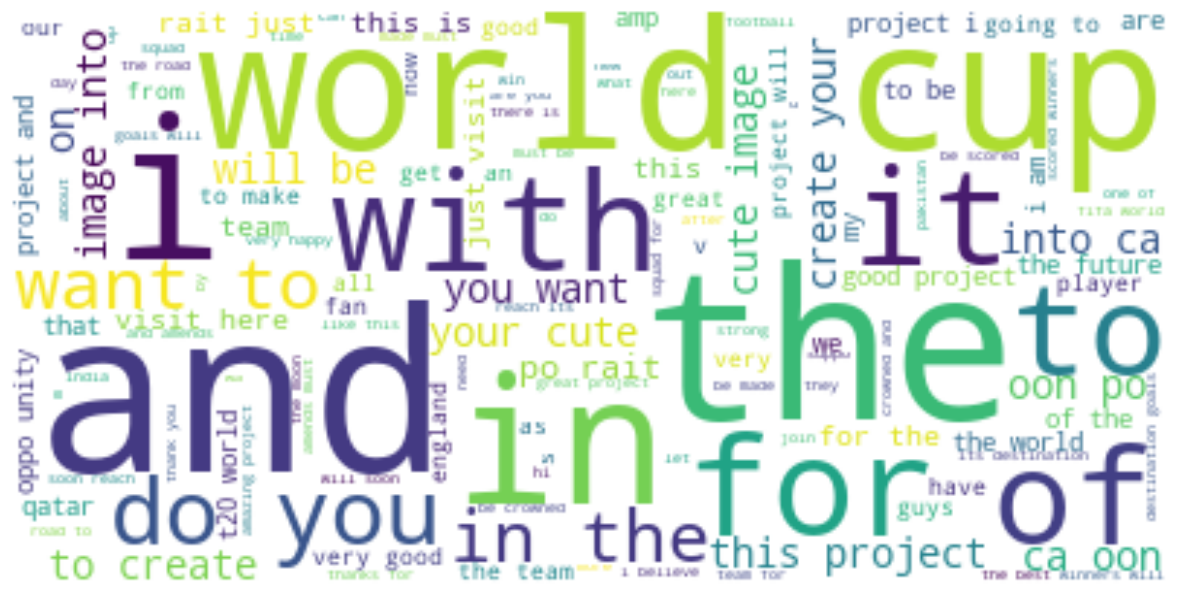

In [ ]:
text = " ".join(i for i in df_data['clean_text'])
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.figure(figsize=(15,10), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Non-Negative Matrix Factorization (NMF)

In [ ]:
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


## LDA

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components, random_state=1).fit(tfidf)
lda.components_

array([[0.10000001, 0.1       , 0.1       , ..., 0.10000001, 0.1       ,
        0.1       ],
       [0.40075414, 0.41445972, 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.10024227, 0.39989844, 0.1       , ..., 0.10008131, 0.1       ,
        0.1       ],
       ...,
       [0.3150372 , 0.1       , 0.1       , ..., 0.10000001, 0.1       ,
        0.1       ],
       [0.10000001, 0.1       , 0.1       , ..., 0.10000001, 0.66557375,
        0.66557139],
       [0.10000001, 0.1       , 0.1       , ..., 0.10000001, 0.6734351 ,
        0.1       ]])

## LSA

In [ ]:
lsa = TruncatedSVD(n_components=n_components, random_state=1, algorithm='arpack').fit(tfidf)

## Getting Topics

In [ ]:
def get_model_topics(model, vectorizer, topics, n_top_words=n_top_words):
    word_dict = {}
    feature_names = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        word_dict[topics[topic_idx]] = top_features

    return pd.DataFrame(word_dict)

In [ ]:

def get_inference(model, vectorizer, topics, text, threshold):
    v_text = vectorizer.transform([text])
    score = model.transform(v_text)

    labels = set()
    for i in range(len(score[0])):
        if score[0][i] > threshold:
            labels.add(topics[i])

    if not labels:
        return 'None', -1, set()

    return topics[np.argmax(score)], score, labels

## Text example to be projected to each topic

In [ ]:
text = 'cumplimiento del acuerdo de paz'

## Topics found by NMF

In [ ]:
print(get_model_topics(nmf, tfidf_vectorizer, nmf_topics))
topic, score, _ = get_inference(nmf, tfidf_vectorizer, nmf_topics, text, 0)
print(topic, score)

      topic-1 topic-2    topic-3          topic-4       topic-5  \
0        cute     the       2022     good project            be   
1  visit here     and  world cup             good          must   
2    you want    this        cup          project          will   
3   rait just      to      world        very good       will be   
4        rait     for   cup 2022             very           and   
5  just visit      is  t20 world           strong       winners   
6   to create      of        t20     this project      the road   
7   your cute      in    2022 10   strong project        amends   
8     po rait    team         10      project and  families who   
9     into ca      it      qatar  amazing project      families   

         topic-6     topic-7 topic-8    topic-9        topic-10  
0           nice          in    khan         at         project  
1   nice project       comes    shah    at home     the project  
2        project      am not     ali        yes    project will 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


## Topics found by LSA

In [ ]:
print(get_model_topics(lsa, tfidf_vectorizer, lsa_topics))
topic, score, _ = get_inference(lsa, tfidf_vectorizer, lsa_topics, text, 0)
print(topic, score)


           topic-1           topic-2         topic-3         topic-4  \
0              paz               paz           ganar           ganar   
1           social   justicia social           vamos   ganar primera   
2  justicia social          justicia             hoy          vuelta   
3         justicia            social            toda  primera vuelta   
4     paz justicia      paz justicia         primera         primera   
5            petro               ano          cambio           vamos   
6           cambio  construccion paz          vuelta           petro   
7             pais            camino  primera vuelta             paz   
8          gustavo           fuerzas   ganar primera            2022   
9    gustavo petro            calles            2022      ganar 2022   

              topic-5     topic-6       topic-7                topic-8  \
0                 mas        toda            si                    hoy   
1            congreso       vamos         votar            

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Topics found by LDA

In [ ]:
print(get_model_topics(lda, tf_vectorizer, lda_topics))
topic, score, _ = get_inference(lda, tf_vectorizer, lda_topics, text, 0)
print(topic, score)

    topic-1                topic-2        topic-3   topic-4     topic-5  \
0   gracias           expropiacion          petro     votar       vamos   
1      impo        paramilitarismo        gustavo     lider        toda   
2    abrazo                tambien  gustavo petro      sera   tendencia   
3  uribismo             disfrazada     presidente       ser  vamos toda   
4     demas   dictadura disfrazada          mejor    manana         hoy   
5     salud  disfrazada democracia      excelente     poder   esperanza   
6    pueblo              dictadura           pais      luis     hagamos   
7   siempre             democracia         cambio      debe       petro   
8    bogota                    hoy       necesita  debe ser       trino   
9    madres               gobierno       proyecto     ganar         mas   

              topic-6    topic-7        topic-8           topic-9   topic-10  
0            congreso       gran             si               paz       debe  
1  congreso repu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
